In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
# x_train = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 70-30 X_Train.csv')

# x_test = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 70-30 X_Test.csv')

# y_train = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 70-30 Y_Train.csv')

# y_test = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 70-30 Y_Test.csv')

In [3]:
x_train = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 70-30 X_Train.csv')

x_test = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 70-30 X_Test.csv')

y_train = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 70-30 Y_Train.csv')

y_test = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 70-30 Y_Test.csv')

In [4]:
x_train

Gender       AGE      Urea        Cr     HbA1c      Chol        TG  \
0    0.896617  0.032034 -0.054052 -0.128564 -0.720501 -0.816991 -0.855640   
1    0.896617 -1.966008  2.181869  1.504902  0.461613  0.264700 -0.855640   
2    0.896617  0.531544 -0.721925 -0.496462 -0.072245 -0.044354 -0.769694   
3   -1.115304  1.930174  2.559363  2.358425  1.376799  0.496491  1.464903   
4    0.896617  0.431642 -0.402507  0.106890  2.406382  3.119648 -0.769694   
..        ...       ...       ...       ...       ...       ...       ...   
179 -1.115304  0.032034  0.178251  0.077458 -1.101829 -0.121618 -0.769694   
180 -1.115304 -0.567379 -0.489621 -0.746633 -0.987430  0.496491 -0.254017   
181  0.896617  0.831251  3.582000  4.342622  0.842941  1.500918  0.691389   
182 -1.115304  0.531544  0.265365  1.254732  0.042153 -0.507936  0.175713   
183  0.896617  0.631446  3.582000  4.342622  0.804808 -0.044354 -0.082125   

          HDL       LDL      VLDL       BMI  
0   -0.480919 -0.473748 -0.451293 -1.114137  
1    1.386073  1.596949 -0.141839 -1.114137  
2    0.219203  0.250996 -0.451293  0.657481  
3    0.452577 -0.266678  0.291397  1.004102  
4    0.919325 -0.163143  0.477069  1.774371  
..        ...       ...       ...       ...  
179  1.386073  1.596949 -0.018057 -0.921570  
180 -0.714293  1.079275 -0.203730 -0.343869  
181 -0.247545  1.804019  0.043833  1.196669  
182 -0.480919 -0.577283 -0.141839  1.196669  
183 -0.014171 -0.059609 -0.203730  1.581804  

[184 rows x 11 columns]

In [5]:
print(y_train['Class'].value_counts())

2    91
0    64
1    29
Name: Class, dtype: int64


# Backward Feature Elimination using Logistic Regression

In [6]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
sfs1 = sfs(lreg, k_features=10, forward=False, verbose=1, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

# **Feature Ranking**

In [7]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

# **Ranking wise Feature Lists**

In [8]:
# BFE_Top_4_X = x_train[['Gender', 'AGE', 'Urea', 'Cr']]
# BFE_Top_5_X = x_train[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c']]
# BFE_Top_7_X = x_train[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG']]
# BFE_Top_9_X = x_train[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'VLDL']]
# x_train = BFE_Top_9_X

In [9]:
# BFE_Top_4_X = x_test[['Gender', 'AGE', 'Urea', 'Cr']]
# BFE_Top_5_X = x_test[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c']]
# BFE_Top_7_X = x_test[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG']]
# BFE_Top_9_X = x_test[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'VLDL']]
# BFE_Top_10_X = x_test[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'VLDL']]
# x_test = BFE_Top_4_X

In [10]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [11]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# Support Vector Classifier Train, Test 

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.9
[[31  0  1]
 [ 2  7  2]
 [ 1  2 34]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       0.78      0.64      0.70        11
           2       0.92      0.92      0.92        37

    accuracy                           0.90        80
   macro avg       0.87      0.84      0.85        80
weighted avg       0.90      0.90      0.90        80



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8966503267973855
f1 Score  0.8970075757575758
Recall  0.9
Specificity/TNR: 1.0
Cohen Kappa: 0.8335067637877211
AUC Score  0.977387817853645


In [14]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9,
  0.8966503267973855,
  0.9,
  0.8970075757575758,
  0.8335067637877211,
  0.977387817853645]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.02286913, 0.01047137, 0.01037152, 0.01052849, 0.01376226,
        0.01027586, 0.01023343, 0.0094744 , 0.01311576, 0.01047168,
        0.00979054, 0.01196749, 0.01396167, 0.01077018, 0.01166811,
        0.01700635, 0.01541011, 0.01146977, 0.00977335, 0.01346309,
        0.02104306, 0.01260087, 0.01106882, 0.00971086, 0.01356366,
        0.01406193, 0.01226411, 0.01600759, 0.01283073, 0.01356351,
        0.0108707 , 0.0111722 , 0.01475716, 0.01226676, 0.00980649,
        0.01336324, 0.01550884, 0.01386099, 0.01166825, 0.01246562,
        0.02219081, 0.01585562, 0.01027191, 0.01022308, 0.01964726,
        0.01665483, 0.01136997, 0.00827971, 0.01216609, 0.01499689,
        0.01097038, 0.01127005, 0.01555758, 0.01376281, 0.00998936,
        0.0138768 , 0.01605504, 0.01496062, 0.01067076, 0.01256623,
        0.02343609, 0.01560988, 0.01017225, 0.01027217, 0.0139622 ,
        0.01545916, 0.01116998, 0.009041  , 0.01216586, 0.01700275,
        0.01316359, 0.01376204,

In [16]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.022869      0.005043         0.003392        0.001493       1   
1         0.010471      0.001624         0.002095        0.000538       1   
2         0.010372      0.001418         0.002292        0.000780       1   
3         0.010528      0.001416         0.002391        0.000802       1   
4         0.013762      0.001768         0.002294        0.000898       1   
..             ...           ...              ...             ...     ...   
395       0.014325      0.002165         0.002645        0.000448      20   
396       0.021446      0.002320         0.003246        0.001190      20   
397       0.059858      0.025603         0.003494        0.001516      20   
398       0.015067      0.002329         0.003091        0.000829      20   
399       0.017010      0.001273         0.002751        0.000555      20   

    param_gamma param_kernel                                           params  \
0             1          rbf            {'C': 1, 'gamma': 1, 'kernel': 'rbf'}   
1             1       linear         {'C': 1, 'gamma': 1, 'kernel': 'linear'}   
2             1         poly           {'C': 1, 'gamma': 1, 'kernel': 'poly'}   
3             1      sigmoid        {'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}   
4           0.1          rbf          {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}   
..          ...          ...                                              ...   
395       0.001      sigmoid   {'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}   
396      0.0001          rbf      {'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}   
397      0.0001       linear   {'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}   
398      0.0001         poly     {'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}   
399      0.0001      sigmoid  {'C': 20, 'gamma': 0.0001, 'kernel': 'sigmoid'}   

     split0_test_score  split1_test_score  ...  split3_test_score  \
0             0.736842           0.631579  ...           0.631579   
1             0.947368           0.842105  ...           0.842105   
2             0.894737           0.842105  ...           0.842105   
3             0.631579           0.684211  ...           0.789474   
4             0.842105           0.736842  ...           0.894737   
..                 ...                ...  ...                ...   
395           0.789474           0.789474  ...           0.842105   
396           0.789474           0.789474  ...           0.789474   
397           0.894737           0.842105  ...           0.842105   
398           0.473684           0.473684  ...           0.473684   
399           0.578947           0.473684  ...           0.578947   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.666667           0.555556           0.777778   
1             0.777778           0.833333           0.888889   
2             0.777778           0.722222           0.888889   
3             0.777778           0.833333           0.722222   
4             0.777778           0.722222           0.888889   
..                 ...                ...                ...   
395           0.833333           0.833333           0.777778   
396           0.833333           0.777778           0.777778   
397           0.833333           0.888889           0.888889   
398           0.555556           0.500000           0.500000   
399           0.722222           0.611111           0.555556   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0             0.722222           0.666667           0.666667         0.673977   
1             0.888889           0.944444           0.833333         0.869298   
2             0.666667           0.833333           0.722222         0.803216   
3             0.611111           0.722222           0.722222         0.723099   
4             0.666667           0.777778           0.833333         0.803509   
..                 ... 

In [17]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

param_C param_kernel  mean_test_score
0         1          rbf         0.673977
1         1       linear         0.869298
2         1         poly         0.803216
3         1      sigmoid         0.723099
4         1          rbf         0.803509
..      ...          ...              ...
395      20      sigmoid         0.804094
396      20          rbf         0.793275
397      20       linear         0.880702
398      20         poly         0.495029
399      20      sigmoid         0.588012

[400 rows x 3 columns]

In [18]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.891812865497076
{'C': 16, 'gamma': 1, 'kernel': 'linear'}


In [19]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.77      0.91      0.83        11
           2       0.94      0.89      0.92        37

    accuracy                           0.93        80
   macro avg       0.89      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80



In [20]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9293406593406595
f1 Score  0.9260416666666668
Recall  0.925
Specificity/TNR: 1.0
Cohen Kappa: 0.8781107160995429
AUC Score  0.9832757168232553


In [21]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.891812865497076,
  0.9293406593406595,
  0.925,
  0.9260416666666668,
  0.8781107160995429,
  0.9832757168232553]}

# Logistic Regression Train, Test

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.886
Testing Accuracy: 0.925
[[30  1  1]
 [ 0 10  1]
 [ 0  3 34]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.71      0.91      0.80        11
           2       0.94      0.92      0.93        37

    accuracy                           0.93        80
   macro avg       0.89      0.92      0.90        80
weighted avg       0.94      0.93      0.93        80



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9350198412698413
f1 Score  0.9279186920017676
Recall  0.925
Specificity/TNR: 0.967741935483871
Cohen Kappa: 0.8786039453717754
AUC Score  0.9637349640450154


In [24]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9,
  0.8966503267973855,
  0.9,
  0.8970075757575758,
  0.8335067637877211,
  0.977387817853645],
 'LR': [0.925,
  0.9350198412698413,
  0.925,
  0.9279186920017676,
  0.8786039453717754,
  0.9637349640450154]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [25]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00598795, 0.02313752, 0.00548472, 0.01635518, 0.00568461,
        0.02278991, 0.00508602, 0.01605642, 0.00688124, 0.03016977,
        0.00777781, 0.0171109 , 0.00756397, 0.02626662, 0.00608246,
        0.02044425, 0.00877657, 0.03458414, 0.00763319, 0.02050331,
        0.00728259, 0.02555585, 0.00648618, 0.02030489, 0.00857916,
        0.02758226, 0.00773292, 0.0199084 , 0.00778422, 0.0269347 ,
        0.00608325, 0.01990786, 0.00793426, 0.02858701, 0.00668371,
        0.01880701, 0.0079807 , 0.04080727, 0.00633502, 0.01995592]),
 'std_fit_time': array([0.00059145, 0.00288342, 0.00080422, 0.00173826, 0.00063884,
        0.00289029, 0.00069784, 0.0016359 , 0.00094155, 0.01413186,
        0.00259356, 0.00231883, 0.00160854, 0.00310388, 0.000698  ,
        0.0067243 , 0.00342023, 0.01043453, 0.00350321, 0.00539779,
        0.00132523, 0.00391873, 0.00154172, 0.00330325, 0.00166463,
        0.00375255, 0.00386305, 0.00447148, 0.00171719, 0.00196831,
        0.000

In [26]:
df_lr_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_lr_grid

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.022869      0.005043         0.003392        0.001493       1   
1         0.010471      0.001624         0.002095        0.000538       1   
2         0.010372      0.001418         0.002292        0.000780       1   
3         0.010528      0.001416         0.002391        0.000802       1   
4         0.013762      0.001768         0.002294        0.000898       1   
..             ...           ...              ...             ...     ...   
395       0.014325      0.002165         0.002645        0.000448      20   
396       0.021446      0.002320         0.003246        0.001190      20   
397       0.059858      0.025603         0.003494        0.001516      20   
398       0.015067      0.002329         0.003091        0.000829      20   
399       0.017010      0.001273         0.002751        0.000555      20   

    param_gamma param_kernel                                           params  \
0             1          rbf            {'C': 1, 'gamma': 1, 'kernel': 'rbf'}   
1             1       linear         {'C': 1, 'gamma': 1, 'kernel': 'linear'}   
2             1         poly           {'C': 1, 'gamma': 1, 'kernel': 'poly'}   
3             1      sigmoid        {'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}   
4           0.1          rbf          {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}   
..          ...          ...                                              ...   
395       0.001      sigmoid   {'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}   
396      0.0001          rbf      {'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}   
397      0.0001       linear   {'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}   
398      0.0001         poly     {'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}   
399      0.0001      sigmoid  {'C': 20, 'gamma': 0.0001, 'kernel': 'sigmoid'}   

     split0_test_score  split1_test_score  ...  split3_test_score  \
0             0.736842           0.631579  ...           0.631579   
1             0.947368           0.842105  ...           0.842105   
2             0.894737           0.842105  ...           0.842105   
3             0.631579           0.684211  ...           0.789474   
4             0.842105           0.736842  ...           0.894737   
..                 ...                ...  ...                ...   
395           0.789474           0.789474  ...           0.842105   
396           0.789474           0.789474  ...           0.789474   
397           0.894737           0.842105  ...           0.842105   
398           0.473684           0.473684  ...           0.473684   
399           0.578947           0.473684  ...           0.578947   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.666667           0.555556           0.777778   
1             0.777778           0.833333           0.888889   
2             0.777778           0.722222           0.888889   
3             0.777778           0.833333           0.722222   
4             0.777778           0.722222           0.888889   
..                 ...                ...                ...   
395           0.833333           0.833333           0.777778   
396           0.833333           0.777778           0.777778   
397           0.833333           0.888889           0.888889   
398           0.555556           0.500000           0.500000   
399           0.722222           0.611111           0.555556   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0             0.722222           0.666667           0.666667         0.673977   
1             0.888889           0.944444           0.833333         0.869298   
2             0.666667           0.833333           0.722222         0.803216   
3             0.611111           0.722222           0.722222         0.723099   
4             0.666667           0.777778           0.833333         0.803509   
..                 ... 

In [27]:
df_lr_grid[['param_C', 'param_kernel', 'mean_test_score']]

param_C param_kernel  mean_test_score
0         1          rbf         0.673977
1         1       linear         0.869298
2         1         poly         0.803216
3         1      sigmoid         0.723099
4         1          rbf         0.803509
..      ...          ...              ...
395      20      sigmoid         0.804094
396      20          rbf         0.793275
397      20       linear         0.880702
398      20         poly         0.495029
399      20      sigmoid         0.588012

[400 rows x 3 columns]

In [28]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.8739766081871346
{'C': 2.7825594022071245, 'penalty': 'l1', 'solver': 'saga'}


In [29]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.71      0.91      0.80        11
           2       0.94      0.92      0.93        37

    accuracy                           0.93        80
   macro avg       0.89      0.92      0.90        80
weighted avg       0.94      0.93      0.93        80



In [30]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9350198412698413
f1 Score  0.9279186920017676
Recall  0.925
Specificity/TNR: 0.967741935483871
Cohen Kappa: 0.8786039453717754
AUC Score  0.9721449427355013


In [31]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.891812865497076,
  0.9293406593406595,
  0.925,
  0.9260416666666668,
  0.8781107160995429,
  0.9832757168232553],
 'LR': [0.8739766081871346,
  0.9350198412698413,
  0.925,
  0.9279186920017676,
  0.8786039453717754,
  0.9721449427355013]}

# KNN Train, Test

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.7875
0.7875
[[28  3  1]
 [ 4  5  2]
 [ 5  2 30]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        32
           1       0.50      0.45      0.48        11
           2       0.91      0.81      0.86        37

    accuracy                           0.79        80
   macro avg       0.72      0.71      0.71        80
weighted avg       0.79      0.79      0.79        80



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [33]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.7919072481572481
f1 Score  0.7865424430641822
Recall  0.7875
Specificity/TNR: 0.9032258064516129
Cohen Kappa: 0.6499356499356499
AUC Score  0.8985683524368829


In [34]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9,
  0.8966503267973855,
  0.9,
  0.8970075757575758,
  0.8335067637877211,
  0.977387817853645],
 'LR': [0.925,
  0.9350198412698413,
  0.925,
  0.9279186920017676,
  0.8786039453717754,
  0.9637349640450154],
 'KNN': [0.7875,
  0.7919072481572481,
  0.7875,
  0.7865424430641822,
  0.6499356499356499,
  0.8985683524368829]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [35]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.0361212 , 0.04305658, 0.0407141 , 0.03332317, 0.03701341,
        0.03282986, 0.04246032, 0.04394517, 0.08830149, 0.05213692,
        0.04854124, 0.03557265, 0.0590735 , 0.05502868, 0.06884208,
        0.03677037, 0.07747865, 0.07588134, 0.05253472, 0.06894591,
        0.06686068, 0.07902594, 0.07828095, 0.05827053, 0.06270771,
        0.07982359, 0.06185839, 0.04549959, 0.08227313, 0.03896782,
        0.06830211, 0.05582473, 0.0544822 , 0.04395676, 0.05189433,
        0.07294607, 0.07513421, 0.05333614, 0.07294061, 0.06725352,
        0.07718475, 0.04724543, 0.05328622, 0.05782371, 0.06605647,
        0.056126  , 0.05981579, 0.03622487, 0.07902944, 0.06730292,
        0.04764261, 0.10616679, 0.06500552, 0.06545608, 0.07424364,
        0.04445615, 0.05438242, 0.08072169, 0.04191177, 0.08715706,
        0.06550548, 0.05492458, 0.04340081, 0.06419928, 0.10986314,
        0.05353715, 0.05437944, 0.06316276, 0.05124147, 0.06475785,
        0.0547266 , 0.05857272,

In [36]:
df_lr_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_lr_grid

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.036121      0.026009         0.010225        0.003025   
1         0.043057      0.026954         0.005890        0.004384   
2         0.040714      0.013837         0.010525        0.010258   
3         0.033323      0.010951         0.005937        0.002579   
4         0.037013      0.013676         0.008730        0.002773   
..             ...           ...              ...             ...   
115       0.073686      0.046621         0.004339        0.001412   
116       0.027242      0.026163         0.007680        0.002837   
117       0.061072      0.056510         0.004489        0.001518   
118       0.055823      0.041661         0.008185        0.001672   
119       0.045653      0.019177         0.004786        0.001245   

    param_metric param_n_neighbors param_weights  \
0      minkowski                 1       uniform   
1      minkowski                 1      distance   
2      minkowski                 2       uniform   
3      minkowski                 2      distance   
4      minkowski                 3       uniform   
..           ...               ...           ...   
115    manhattan                18      distance   
116    manhattan                19       uniform   
117    manhattan                19      distance   
118    manhattan                20       uniform   
119    manhattan                20      distance   

                                                params  split0_test_score  \
0    {'metric': 'minkowski', 'n_neighbors': 1, 'wei...           0.894737   
1    {'metric': 'minkowski', 'n_neighbors': 1, 'wei...           0.894737   
2    {'metric': 'minkowski', 'n_neighbors': 2, 'wei...           0.842105   
3    {'metric': 'minkowski', 'n_neighbors': 2, 'wei...           0.894737   
4    {'metric': 'minkowski', 'n_neighbors': 3, 'wei...           0.842105   
..                                                 ...                ...   
115  {'metric': 'manhattan', 'n_neighbors': 18, 'we...           0.789474   
116  {'metric': 'manhattan', 'n_neighbors': 19, 'we...           0.736842   
117  {'metric': 'manhattan', 'n_neighbors': 19, 'we...           0.736842   
118  {'metric': 'manhattan', 'n_neighbors': 20, 'we...           0.789474   
119  {'metric': 'manhattan', 'n_neighbors': 20, 'we...           0.842105   

     split1_test_score  ...  split3_test_score  split4_test_score  \
0             0.789474  ...           0.894737           0.888889   
1             0.789474  ...           0.894737           0.888889   
2             0.789474  ...           0.894737           0.833333   
3             0.789474  ...           0.894737           0.888889   
4             0.947368  ...           0.789474           0.888889   
..                 ...  ...                ...                ...   
115           0.894737  ...           0.842105           0.777778   
116           0.789474  ...           0.789474           0.777778   
117           0.894737  ...           0.842105           0.777778   
118           0.789474  ...           0.789474           0.833333   
119           0.894737  ...           0.842105           0.833333   

     split5_test_score  split6_test_score  split7_test_score  \
0             0.722222           0.833333           0.722222   
1             0.722222           0.833333           0.722222   
2             0.722222           0.833333           0.722222   
3             0.722222           0.833333           0.722222   
4             0.666667           0.833333           0.611111   
..                 ...                ...                ...   
115           0.722222           0.888889           0.777778   
116           0.722222           0.888889           0.777778   
117           0.666667           0.888889           0.777778   
118           0.722222           0.777778           0.777778   
119           0.722222           0.833333           0.777778   

     split8_test_score  spli

In [37]:
df_lr_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

param_metric param_n_neighbors  mean_test_score
0      minkowski                 1         0.787135
1      minkowski                 1         0.787135
2      minkowski                 2         0.798246
3      minkowski                 2         0.787135
4      minkowski                 3         0.781287
..           ...               ...              ...
115    manhattan                18         0.836550
116    manhattan                19         0.788304
117    manhattan                19         0.820175
118    manhattan                20         0.793275
119    manhattan                20         0.835965

[120 rows x 3 columns]

In [38]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.8634502923976608
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [39]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.46      0.55      0.50        11
           2       0.94      0.86      0.90        37

    accuracy                           0.81        80
   macro avg       0.74      0.75      0.74        80
weighted avg       0.83      0.81      0.82        80



In [40]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8260283833813246
f1 Score  0.8179591007583966
Recall  0.8125
Specificity/TNR: 0.84375
Cohen Kappa: 0.6956632006086736
AUC Score  0.9240488438186555


In [41]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.891812865497076,
  0.9293406593406595,
  0.925,
  0.9260416666666668,
  0.8781107160995429,
  0.9832757168232553],
 'LR': [0.8739766081871346,
  0.9350198412698413,
  0.925,
  0.9279186920017676,
  0.8786039453717754,
  0.9721449427355013],
 'KNN': [0.8634502923976608,
  0.8260283833813246,
  0.8125,
  0.8179591007583966,
  0.6956632006086736,
  0.9240488438186555]}

# Result of all classifiers

In [42]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


Metrics       SVC        LR       KNN
0     Accuracy  0.900000  0.925000  0.787500
1    Precision  0.896650  0.935020  0.791907
2       Recall  0.900000  0.925000  0.787500
3     F1 Score  0.897008  0.927919  0.786542
4  Cohen Kappa  0.833507  0.878604  0.649936
5          AUC  0.977388  0.963735  0.898568

# Result of all classifiers after hyperparameter tuning 

In [43]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

Metrics       SVC        LR       KNN
0     Accuracy  0.891813  0.873977  0.863450
1    Precision  0.929341  0.935020  0.826028
2       Recall  0.925000  0.925000  0.812500
3     F1 Score  0.926042  0.927919  0.817959
4  Cohen Kappa  0.878111  0.878604  0.695663
5          AUC  0.983276  0.972145  0.924049

# Extracting Result

In [44]:
performance_df = performance_df.transpose()
# performance_df.to_csv("Moderately Imbalance 70-30 Applying all Features.csv")

performance_df_grid = performance_df_grid.transpose()
# performance_df_grid.to_csv("Moderately Imbalance 70-30 Applying Hyperparameter all Features.csv")

# ROC Curve

In [45]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

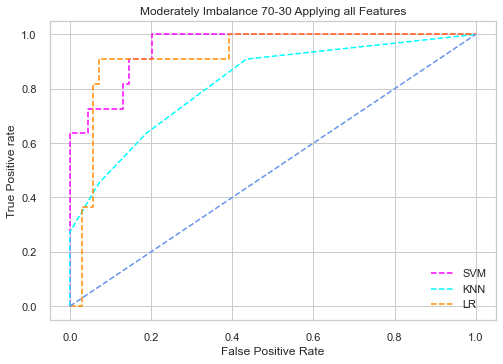

In [46]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('Moderately Imbalance 70-30 Applying all Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig("Moderately Imbalance 70-30 Applying all Features.png", dpi=300)

plt.show();